## **Retail Billing System Using Object Detection**
### YOLOv8 Compatible Dataset Generated And Exported Using [RoboFlow](http://www.roboflow.com/)

#### Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### API/Auth To Link Google Drive Of A Different Google Account

In [ ]:
!sudo add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!sudo apt-get update -qq 2>&1 > /dev/null
!sudo apt -y install -qq google-drive-ocamlfuse 2>&1 > /dev/null
!google-drive-ocamlfuse



debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening 'https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.com%2Foauth2callback&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&

In [ ]:
!sudo apt-get install -qq w3m # to act as web browser 
!xdg-settings set default-web-browser w3m.desktop # to set default browser
%cd /content
!mkdir drive
%cd drive
!mkdir MyDrive
%cd ..
%cd ..
!google-drive-ocamlfuse /content/drive/MyDrive

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package w3m.
(Reading database ... 122354 files and directories currently installed.)
Preparing to unpack .../w3m_0.5.3-37ubuntu0.1_amd64.deb ...
Unpacking w3m (0.5.3-37ubuntu0.1) ...
Setting up w3m (0.5.3-37ubuntu0.1) ...
Processing triggers for man-db (2.9.1-1) ...
Processing triggers for mime-support (3.64ubuntu1) ...
/content
/content/drive
/content
/
Access token retrieved correctly.


#### Installing Dependencies

In [2]:
!git clone https://github.com/ultralytics/ultralytics.git

Cloning into 'ultralytics'...
remote: Enumerating objects: 9322, done.
remote: Counting objects: 100% (1443/1443), done.
remote: Compressing objects: 100% (686/686), done.
remote: Total 9322 (delta 945), reused 1160 (delta 755), pack-reused 7879
Receiving objects: 100% (9322/9322), 6.18 MiB | 1.84 MiB/s, done.
Resolving deltas: 100% (6270/6270), done.


In [3]:
!pip install -r ./ultralytics/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.4/589.4 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.5/206.5 kB 28.2 MB/s eta 0:00:00


#### Checking If Correct Version PyTorch Is Installed

In [5]:
import torch
print(torch.cuda.is_available()) 
print(torch.__version__) 

True
2.0.1+cu118


#### If CUDA Is Not Available, Execute The Following Block

In [ ]:
!pip3 install --upgrade torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

#### Custom Training Using CLI Commands

In [ ]:
%cd /content/drive/MyDrive/Retail-Billing-System
!yolo task=detect mode=train epochs=50 data=dataset/data.yaml model=yolov8l.pt project=/runs/detect batch=20

#### Custom Training Using Ultralytics(YOLOv8) Library Module In Python 

In [ ]:
%cd /content/drive/MyDrive/Retail-Billing-System
from ultralytics import YOLO
model=YOLO("yolov8l.pt")
model.train(data= "dataset/data.yaml",project="runs/detect",batch=20,epochs=50,patience=0)
model.val()

#### Resume Training

In [ ]:
%cd /content/drive/MyDrive/Retail-Billing-System
!yolo task=detect mode=train resume model=runs/detect/train/weights/last.pt data=dataset/data.yaml batch=20 project=/runs/detect

#### Model Performance Metrics

/content/drive/MyDrive/Retail-Billing-System


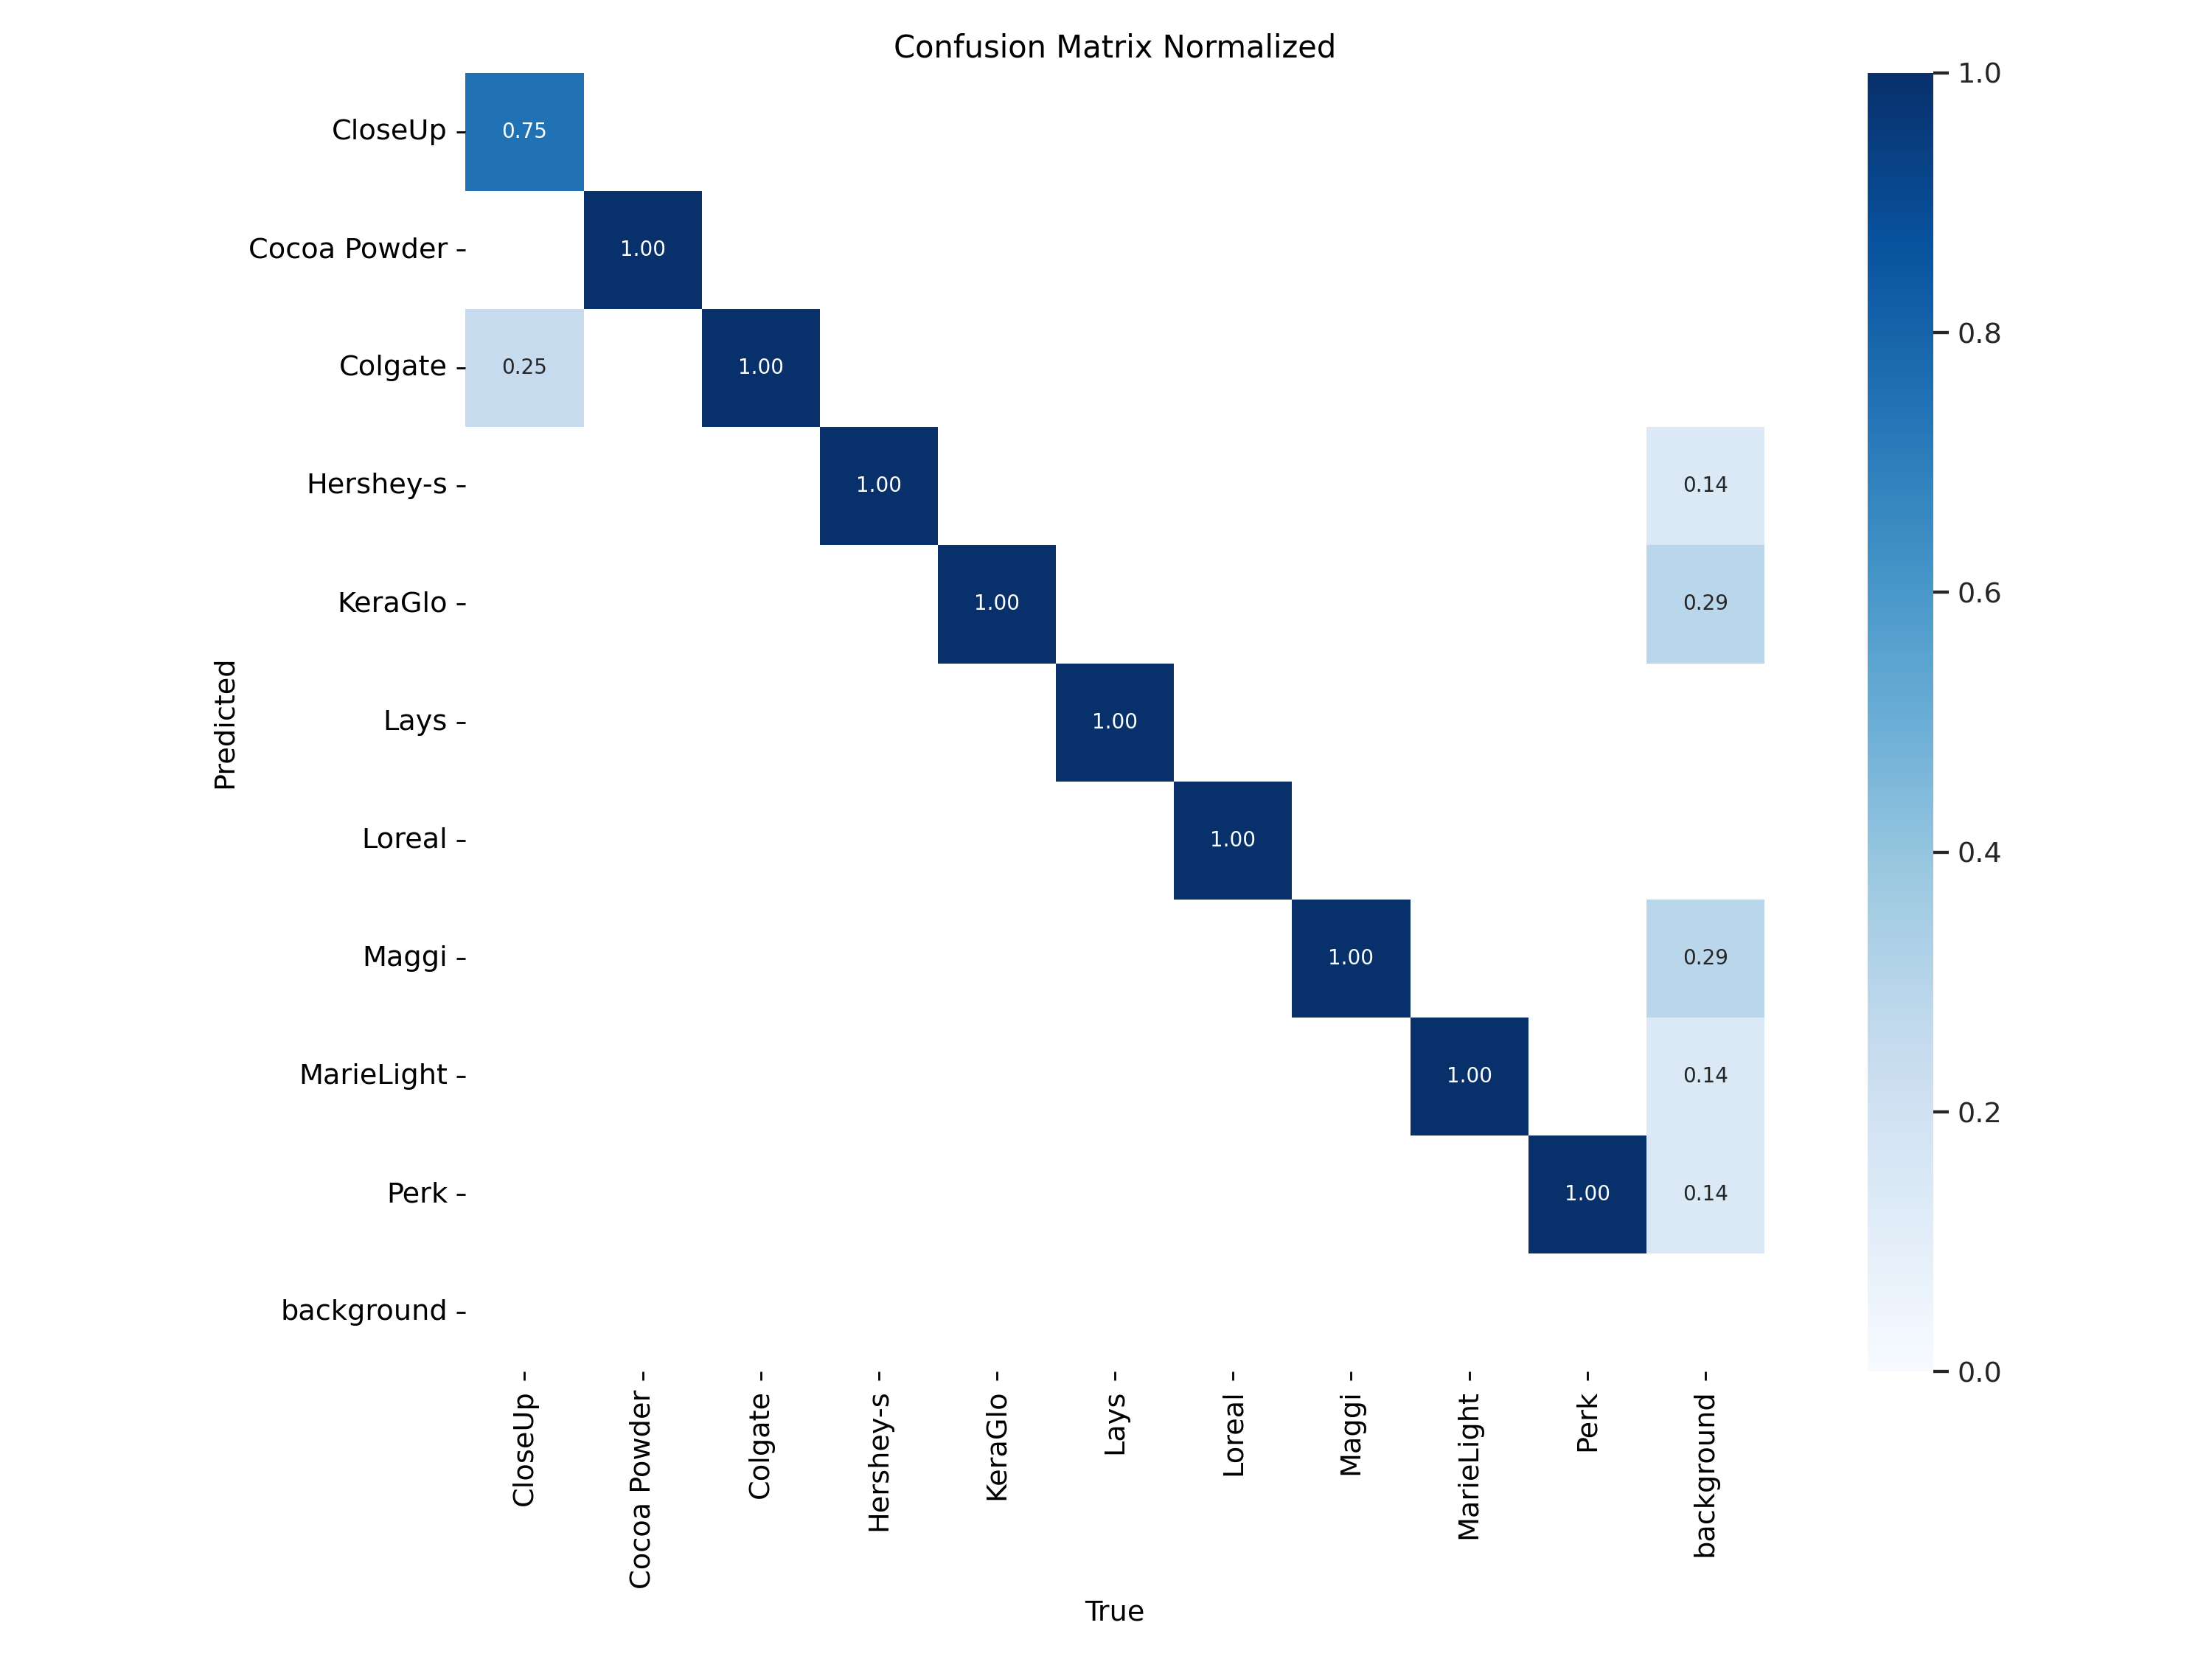

In [7]:
%cd /content/drive/MyDrive/Retail-Billing-System
from PIL import Image
Image.open('runs/detect/train/confusion_matrix_normalized.png')

/content/drive/MyDrive/Retail-Billing-System


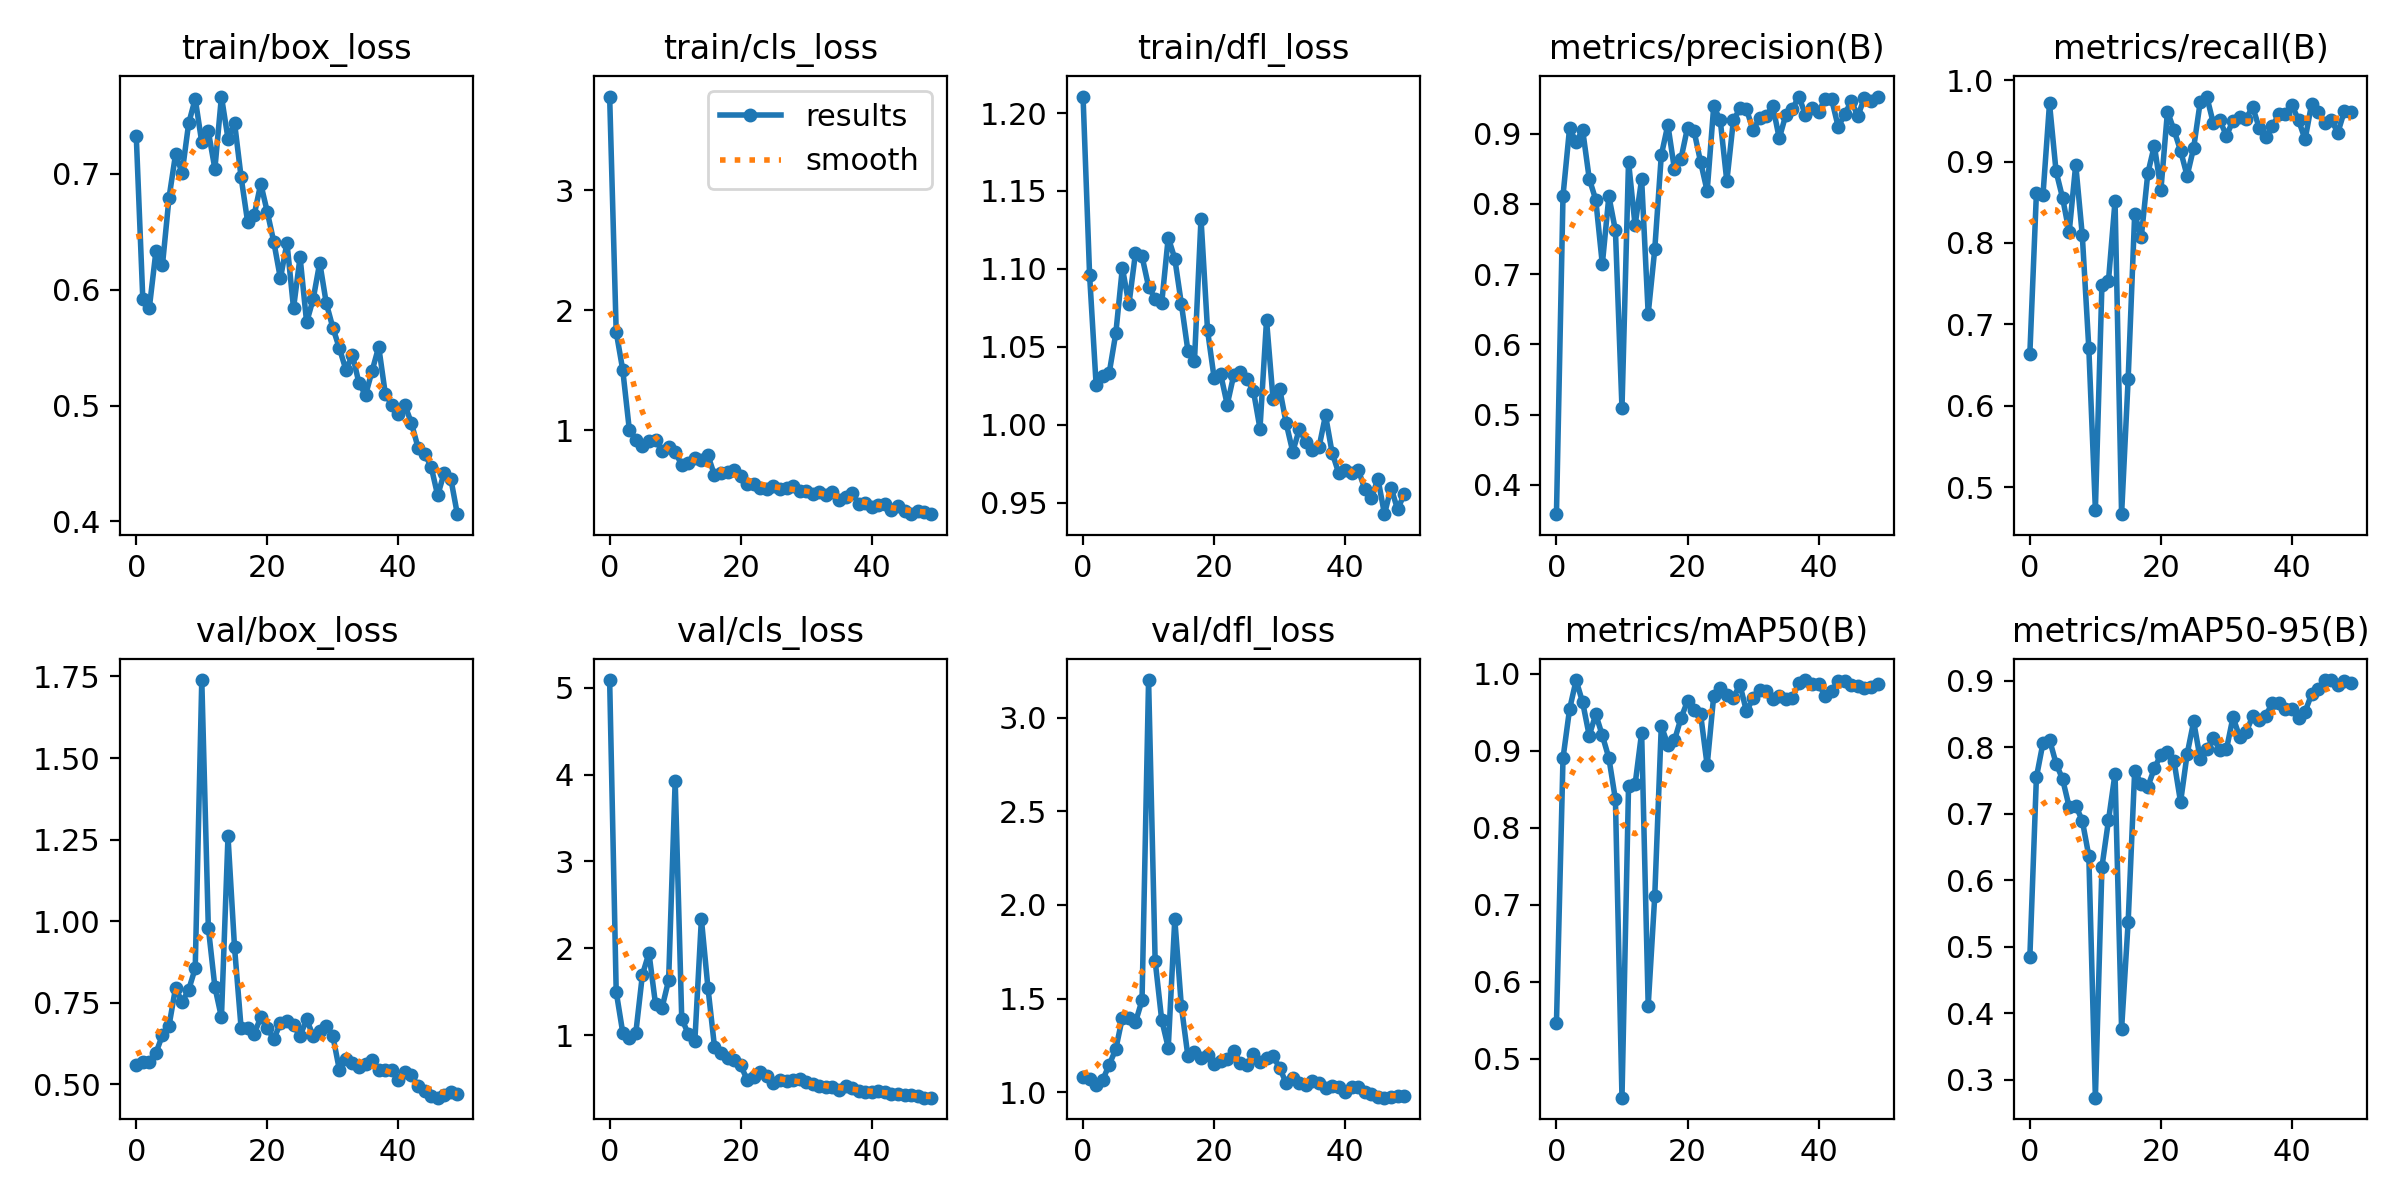

In [8]:
%cd /content/drive/MyDrive/Retail-Billing-System
from PIL import Image
Image.open('runs/detect/train/results.png')

/content/drive/MyDrive/Retail-Billing-System


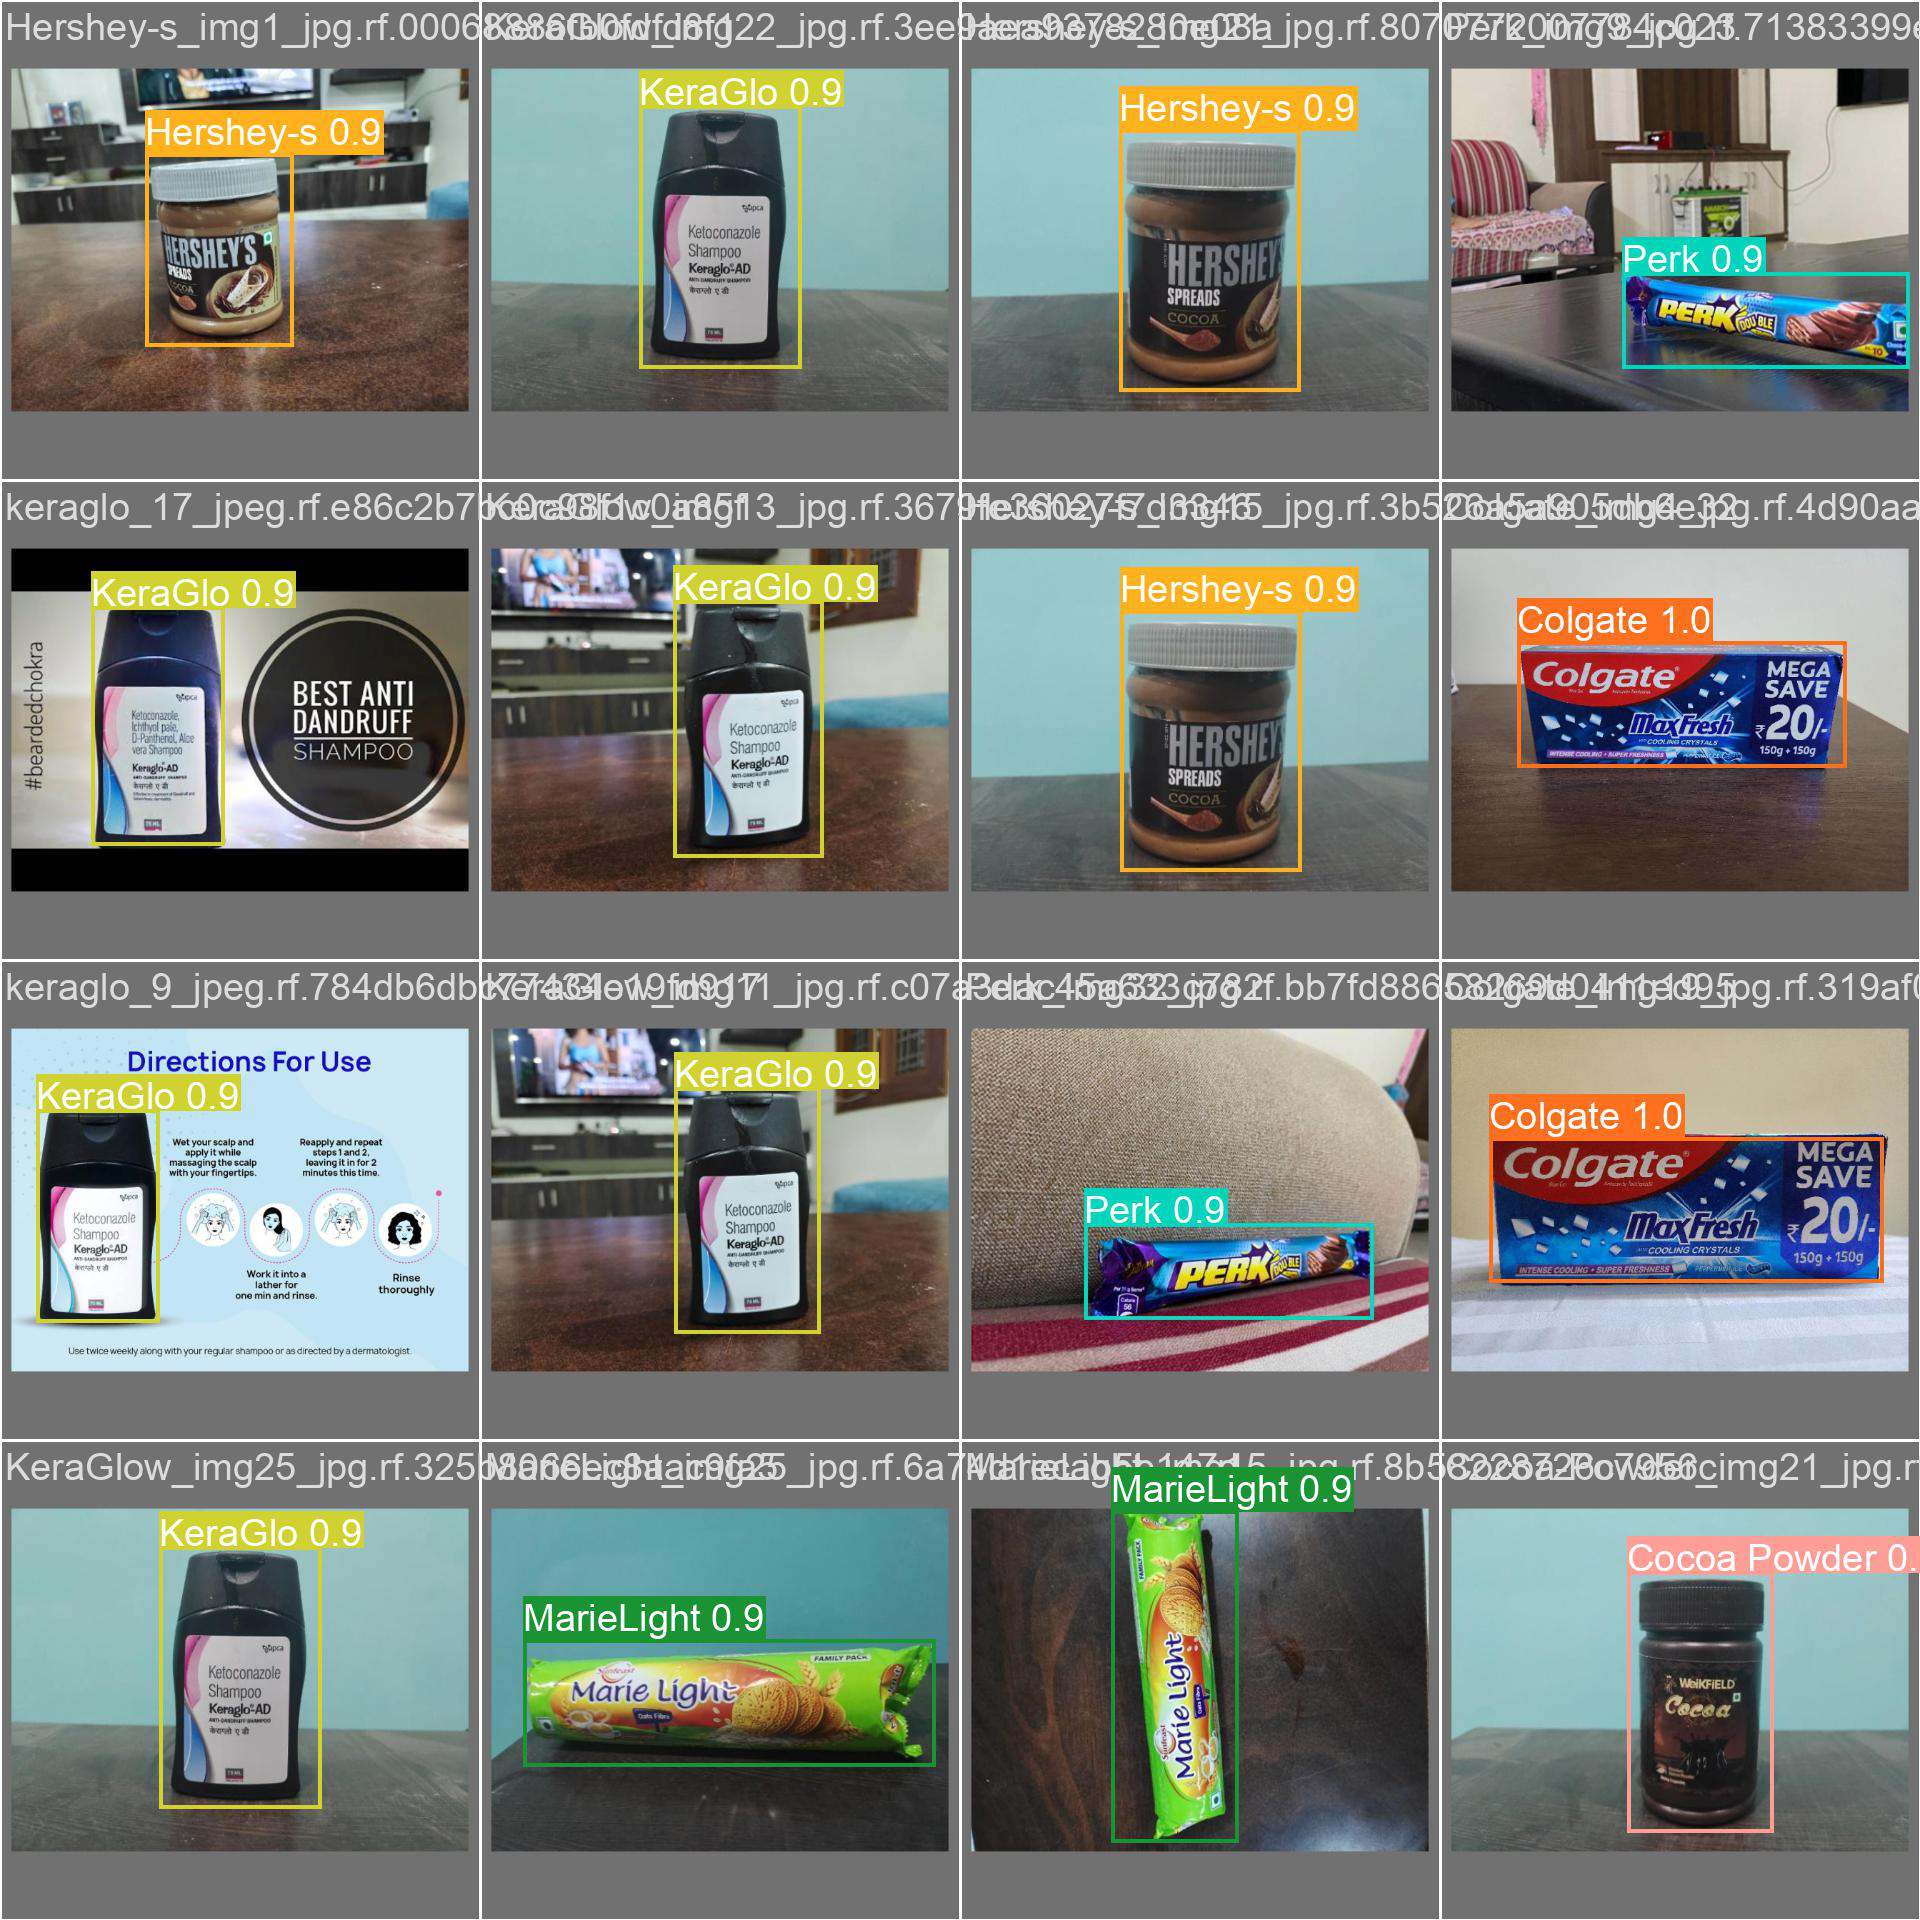

In [9]:
%cd /content/drive/MyDrive/Retail-Billing-System
from PIL import Image
Image.open('runs/detect/train/val_batch0_pred.jpg')

#### Validate Custom Model

In [11]:
%cd /content/drive/MyDrive/Retail-Billing-System
!yolo task=segment mode=val model=runs/detect/train/weights/best.pt data= /content/drive/MyDrive/Retail-Billing-System/dataset/data.yaml

/content/drive/MyDrive/Retail-Billing-System
WARNING ⚠️ conflicting 'task=segment' passed with 'task=detect' model. Ignoring 'task=segment' and updating to 'task=detect' to match model.
Ultralytics YOLOv8.0.107 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43614318 parameters, 0 gradients
100% 755k/755k [00:00<00:00, 54.6MB/s]
val: Scanning /content/drive/MyDrive/Retail-Billing-System/dataset/valid/labels.cache... 68 images, 0 backgrounds, 0 corrupt: 100% 68/68 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 21, len(boxes) = 68. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:14<00:00,  2.88s/it]
                   all         68         68      0.913      0.975     

#### Inference With Custom Model

In [12]:
%cd /content/drive/MyDrive/Retail-Billing-System
!yolo task=segment mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=dataset/test/images save=true

/content/drive/MyDrive/Retail-Billing-System
WARNING ⚠️ conflicting 'task=segment' passed with 'task=detect' model. Ignoring 'task=segment' and updating to 'task=detect' to match model.
Ultralytics YOLOv8.0.107 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43614318 parameters, 0 gradients

image 1/33 /content/drive/MyDrive/Retail-Billing-System/dataset/test/images/CloseUp_img24_jpg.rf.ebb6f5d5d65fd22a02a87113366be269.jpg: 480x640 1 CloseUp, 65.0ms
image 2/33 /content/drive/MyDrive/Retail-Billing-System/dataset/test/images/CloseUp_img25_jpg.rf.ef7921c40c0bf1526fdb6b2e4b193e32.jpg: 480x640 1 CloseUp, 51.3ms
image 3/33 /content/drive/MyDrive/Retail-Billing-System/dataset/test/images/Cocoa-Powder_img18_jpg.rf.d2ca83321550a73a0e02fed8d861c33b.jpg: 480x640 1 Cocoa Powder, 51.3ms
image 4/33 /content/drive/MyDrive/Retail-Billing-System/dataset/test/images/Cocoa-Powder_img1_jpg.rf.91b332d5be35a51e52ccbbe61ed0cdd2.jpg: 480x640 1 Cocoa Powder, 5

/content/drive/MyDrive/Retail-Billing-System


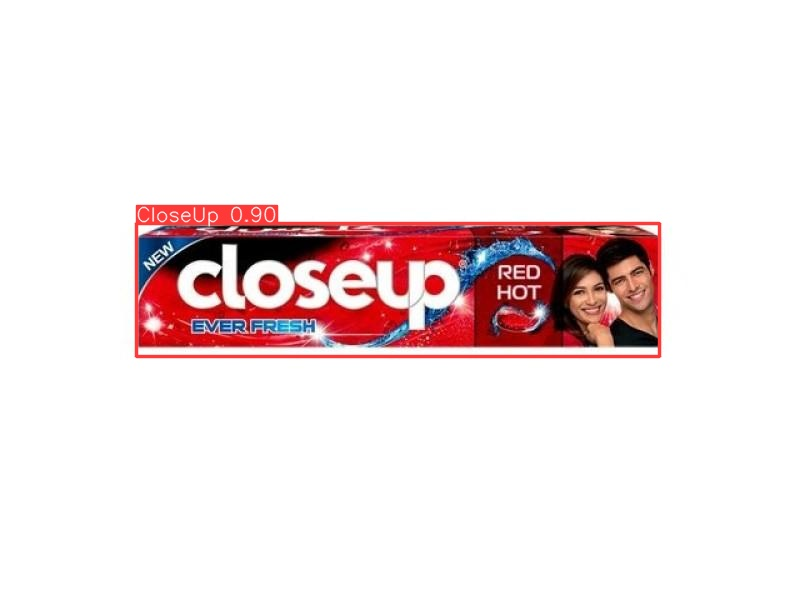

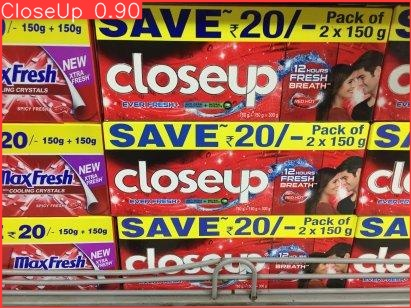

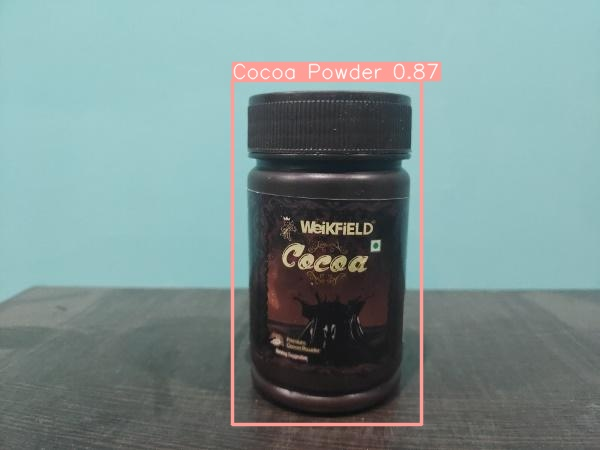

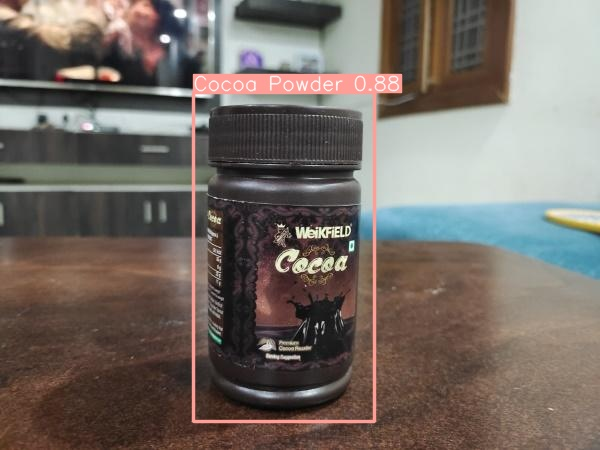

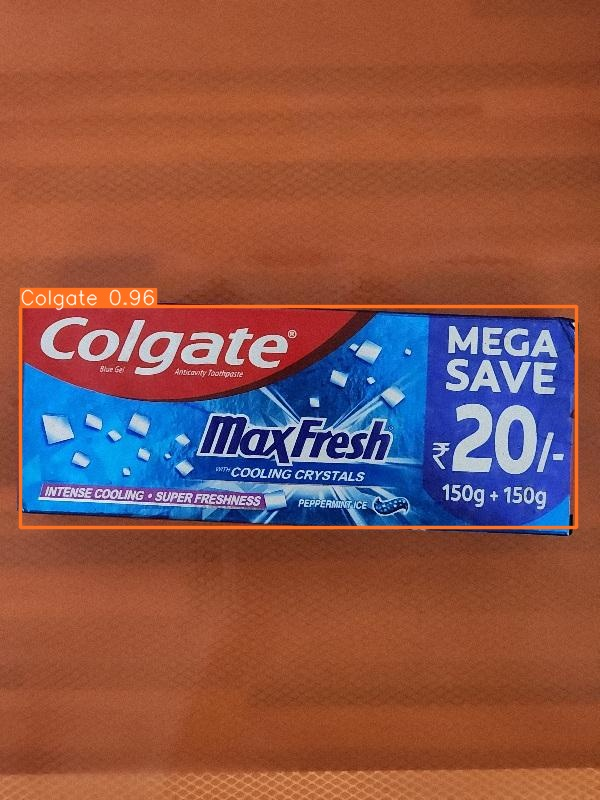

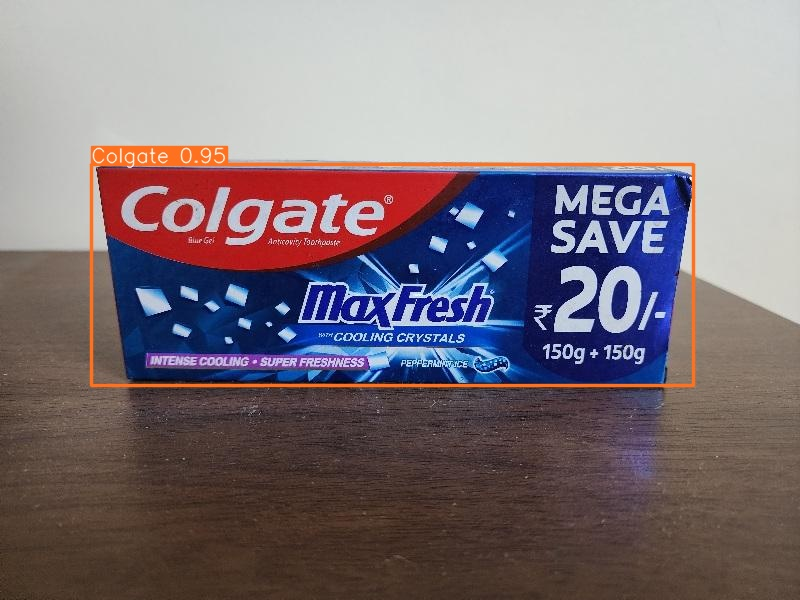

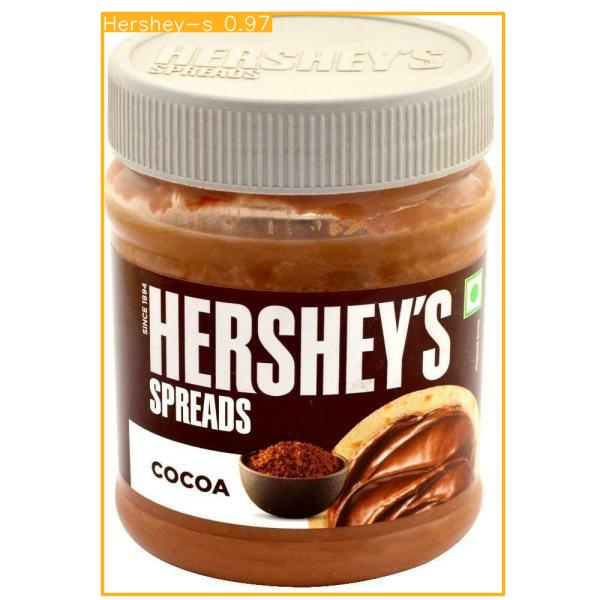

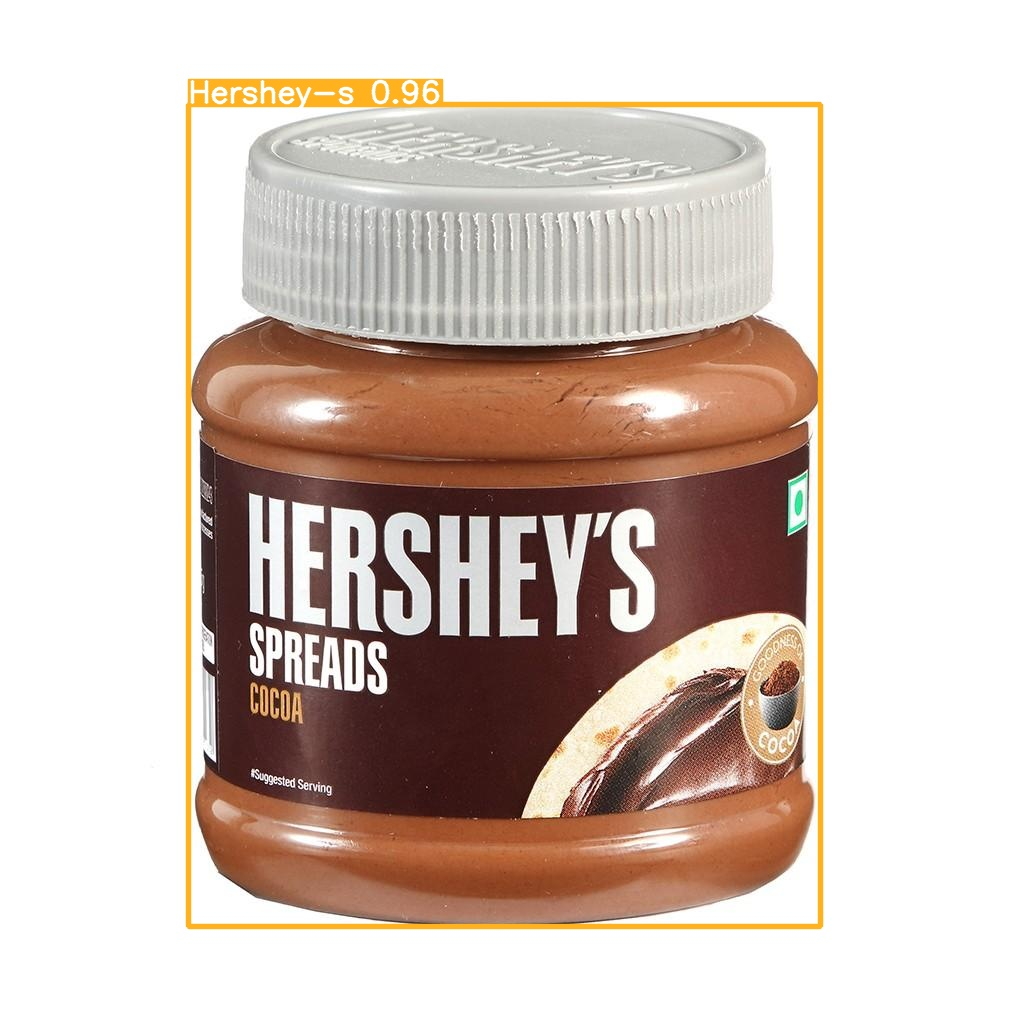

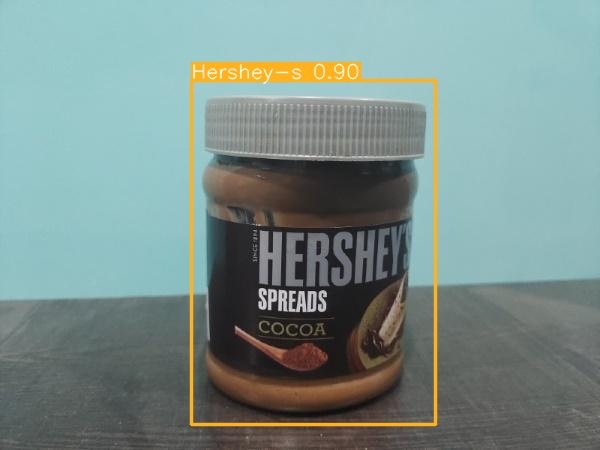

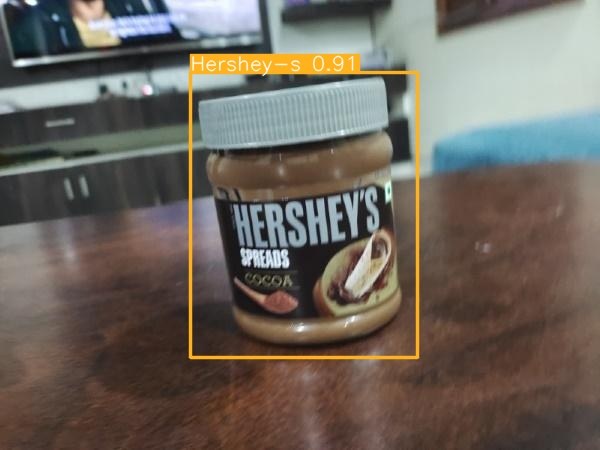

In [13]:
%cd /content/drive/MyDrive/Retail-Billing-System
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict2/*.jpg')[:10]:
      display(Image(filename=image_path, height=600))
      print("\n")

#### Testing Using CLI With Webcam(source=0) Or IP Cam(source=URL) As Source

In [ ]:
%cd /content/drive/MyDrive/Retail-Billing-System
!yolo task=detect mode=predict model=runs/train/weights/best.pt show=True source= #0 or URL

#### Testing Using Ultralytics Library Module In Python

In [14]:
%cd /content/drive/MyDrive/Retail-Billing-System
from ultralytics import YOLO
model=YOLO("runs/detect/train/weights/best.pt")
model.predict(source="test-images/*",project="/content/drive/MyDrive/Retail-Billing-System/runs/detect",show=True,save=True) #source=0 to access webcam or source url to access IP webcam

/content/drive/MyDrive/Retail-Billing-System


WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/2 /content/drive/MyDrive/Retail-Billing-System/test-images/Colgate.png: 640x640 1 Colgate, 63.0ms
image 2/2 /content/drive/MyDrive/Retail-Billing-System/test-images/Test_Colgate.jpg: 448x640 (no detections), 66.9ms
Speed: 2.9ms preprocess, 65.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/drive/MyDrive/Retail-Billing-System/runs/detect/predict3


[ultralytics.yolo.engine.results.Results object with attributes:
 
 boxes: ultralytics.yolo.engine.results.Boxes object
 keypoints: None
 keys: ['boxes']
 masks: None
 names: {0: 'CloseUp', 1: 'Cocoa Powder', 2: 'Colgate', 3: 'Hershey-s', 4: 'KeraGlo', 5: 'Lays', 6: 'Loreal', 7: 'Maggi', 8: 'MarieLight', 9: 'Perk'}
 orig_img: array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 2